In [48]:
# The following should reload if_lib if we change it on disk
%load_ext autoreload
%aimport if_lib, if_utils, if_dpp, if_graphics, if_consts
%autoreload 1
import os
import json
import random

from if_utils import get_filename, show_data, save_traces

from if_lib import generate_random_challenge, read_HMAC, read_keypair, get_id_person, get_location_id, \
get_unit_id, get_resource_spec_id, get_resource, get_process, create_event, make_transfer, reduce_resource, set_user_location

from if_dpp import trace_query, check_traces, er_before, get_dpp

from if_graphics import vis_dpp, make_sankey, consol_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
# We define the constant for our case
USE_CASE = 'Lauds_Machine-3D-Printer'

# What endpoint are we talking to?
# debug
# ENDPOINT = 'http://65.109.11.42:10000/api'
ENDPOINT = 'https://zenflows.interfacer-staging.dyne.im/api'
# ENDPOINT = 'http://zenflows-debug.interfacer.dyne.org/api'
# staging
# ENDPOINT = 'http://65.109.11.42:8000/api'
# ENDPOINT = 'https://zenflows-staging.interfacer.dyne.org/api'
# testing
# ENDPOINT = 'http://65.109.11.42:9000/api'
# ENDPOINT = 'https://zenflows-test.interfacer.dyne.org/api'
#ENDPOINT = 'http://192.168.188.199:8000/api'
#ENDPOINT = 'https://zenflows-staging.interfacer.dyne.im/api'
USERS = ['A', 'B']

In [50]:
# Calculate names of settings files
USERS_FILE = get_filename('cred_users.json', ENDPOINT, USE_CASE)
LOCS_FILE = get_filename('loc_users.json', ENDPOINT, USE_CASE)
UNITS_FILE = get_filename('units_data.json', ENDPOINT, USE_CASE)
SPECS_FILE = get_filename('res_spec_data.json', ENDPOINT, USE_CASE)

In [51]:
# This should print something like
# Generated challenge: MMQ1JSrCA7L4QNftLyaaSRunT4Z9+Rr2QkE+a+DWLEljtg6EroLbCj5VjLH+xba9Rv1D+3ncQHw5s/lH41IFJw==
generate_random_challenge()

Generated challenge: ku2sIfzeA3MHeKerlQMXMq6IRpeyhcc8EcCjz5P5x/tUCkshLMX2MfaPw6xqQNn4QPt27TeUkf9vHSEtXjFiHg==


'ku2sIfzeA3MHeKerlQMXMq6IRpeyhcc8EcCjz5P5x/tUCkshLMX2MfaPw6xqQNn4QPt27TeUkf9vHSEtXjFiHg=='

In [52]:
# Read or define user data that is going to be used in the GraphQL calls

# create data structure to hold processes
process_data = {}

# create data structures to hold resources and events (possibly to compare results from track and trace)
res_data = {}
event_seq = []


if os.path.isfile(USERS_FILE):
    with open(USERS_FILE,'r') as f:
        users_data = json.loads(f.read())
    print("Credentials file available for users")
else:
    users_data = {}
    users_data['A'] = {
      "userChallenges": {
        "whereParentsMet": "London",
        "nameFirstPet": "Fuffy",
        "nameFirstTeacher": "Jim",
        "whereHomeTown": "Paris",
        "nameMotherMaid": "Wright"
      },
      "name": "User A",
      "username": "userA_username",
      "email": "userA@example.org",
      "note": "me.userA.org"
    }
    users_data['B'] = {
        "userChallenges": {
            "whereParentsMet":"Amsterdam",
            "nameFirstPet":"Toby",
            "nameFirstTeacher":"Juliet",
            "whereHomeTown":"Rome",
            "nameMotherMaid":"Banks"
        },
        "name": "User B",
        "username": "userB",
        "email": "userB@example.org",
        "note" : "me.userB.org"
    }

    with open(USERS_FILE,'w') as f:
        json.dump(users_data, f)


if os.path.isfile(LOCS_FILE):
    with open(LOCS_FILE,'r') as f:
        locs_data = json.loads(f.read())
    print("Location file available")
else:
    locs_data = {}
    locs_data['A'] = {
        "name": "OLVG",
        "lat": 52.35871773455108,
        "long": 4.916762398221842,
        "addr": "Oosterpark 9, 1091 AC Amsterdam",
        "note": "location.user1.org"
    }
    locs_data['B'] = {
        "name": "CleanLease",
        "lat" : 51.47240440868687,
        "long" : 5.412460440524406,
        "addr" : "De schakel 30, 5651 Eindhoven",
        "note": "location.user2.org"
    }
    with open(LOCS_FILE,'w') as f:
        json.dump(locs_data, f)


if os.path.isfile(UNITS_FILE):
    with open(UNITS_FILE,'r') as f:
        units_data = json.loads(f.read())
    print(f"Unit file available")
else:
    units_data = {}
#     with open(file,'w') as f:
#         json.dump(units_data, f)



if os.path.isfile(SPECS_FILE):
    with open(SPECS_FILE,'r') as f:
        res_spec_data = json.loads(f.read())
    print(f"Resource Spec file available")
else:
    res_spec_data = {}
  

Credentials file available for users
Location file available
Unit file available
Resource Spec file available


In [53]:
# Read HMAC or get it from the server
for user in USERS:
    read_HMAC(USERS_FILE, users_data, user, endpoint=ENDPOINT)

Server HMAC available for User A
Server HMAC available for User B


In [54]:
# Read the keypair
for user in USERS:
    read_keypair(USERS_FILE, users_data, user)

Keypair available for User A
Keypair available for User B


In [55]:
# read or get id of the person
for user in USERS:
    get_id_person(USERS_FILE, users_data, user, endpoint=ENDPOINT)

Id available for User A
Id available for User B


In [56]:
# Read of get the location id
for user in USERS:
    get_location_id(LOCS_FILE, users_data[user], locs_data, user, endpoint=ENDPOINT)
    set_user_location(USERS_FILE, users_data, locs_data, user, endpoint=ENDPOINT)

Location id available for OLVG
Location id available for User A
Location id available for CleanLease
Location id available for User B


In [57]:
# Get the ids of all units
get_unit_id(UNITS_FILE, users_data['A'], units_data, 'piece', 'u_piece', 'om2:one', endpoint=ENDPOINT)
get_unit_id(UNITS_FILE, users_data['A'], units_data, 'mass', 'kg', 'om2:kilogram', endpoint=ENDPOINT)
get_unit_id(UNITS_FILE, users_data['A'], units_data, 'volume', 'lt', 'om2:litre', endpoint=ENDPOINT)
get_unit_id(UNITS_FILE, users_data['A'], units_data, 'time', 'h', 'om2:hour', endpoint=ENDPOINT)
get_unit_id(UNITS_FILE, users_data['A'], units_data, 'energy', 'Wh', 'om2:wattHour', endpoint=ENDPOINT)



Unit piece available
Unit mass available
Unit volume available
Unit time available
Unit energy available


In [58]:
# Read all the resource specifications for 3D printing workflow

# 3D Printer
name = 'Machine-3D-Printer'
note = 'Specification for the 3D printer used by the operator'
classification = 'https://www.wikidata.org/wiki/Q2095'  # Wikidata: 3D printer
default_unit_id = units_data['piece']['id']
get_resource_spec_id(SPECS_FILE, users_data['A'], res_spec_data, name, note, classification, default_unit_id, endpoint=ENDPOINT)

# Filament
name = 'Filament'
note = 'Specification for 3D printing filament material'
classification = 'https://www.wikidata.org/wiki/Q11782'  # Wikidata: plastic (or adjust to specific filament type)
default_unit_id = units_data['mass']['id']
get_resource_spec_id(SPECS_FILE, users_data['A'], res_spec_data, name, note, classification, default_unit_id, endpoint=ENDPOINT)

# Electrical Energy
name = 'Electrical-Energy'
note = 'Specification for electrical energy consumed during 3D printing'
classification = 'https://www.wikidata.org/wiki/Q6837'  # Wikidata: electricity
default_unit_id = units_data['energy']['id']
get_resource_spec_id(SPECS_FILE, users_data['A'], res_spec_data, name, note, classification, default_unit_id, endpoint=ENDPOINT)

# 3D Object “Luffy”
name = '3D-object-Luffy'
note = 'Specification for the 3D printed object named Luffy'
classification = 'https://www.wikidata.org/wiki/Q1248784'  # Wikidata: manufactured object
default_unit_id = units_data['piece']['id']
get_resource_spec_id(SPECS_FILE, users_data['A'], res_spec_data, name, note, classification, default_unit_id, endpoint=ENDPOINT)

# G-code file specification
name = '3D-gcode-file-Luffy'
note = 'Specification for the 3D printing G-code file for Luffy'
classification = 'https://www.wikidata.org/wiki/Q1073076'  # Wikidata: Computer file
default_unit_id = units_data['piece']['id']
get_resource_spec_id(SPECS_FILE, users_data['A'], res_spec_data, name, note, classification, default_unit_id, endpoint=ENDPOINT)


Specification Machine-3D-Printer available
Specification Filament available
Specification Electrical-Energy available
Specification 3D-object-Luffy available
Specification 3D-gcode-file-Luffy available


In [59]:
# We create the resources that will not be saved to file as it is assumed they are recreated at each run

# 3D printer will be used
res_name = 'Machine-3D-Printer'
amount = 1
get_resource(res_data, res_spec_data, res_name, users_data['A'], event_seq, amount, endpoint=ENDPOINT)

# Filament for printing
res_name = 'Filament'
amount = 1  # in kg (adjust based on your workflow)
get_resource(res_data, res_spec_data, res_name, users_data['A'], event_seq, amount, endpoint=ENDPOINT)

# Electrical energy for printing
res_name = 'Electrical-Energy'
amount = 1000  # in Wh (adjust based on your workflow)
get_resource(res_data, res_spec_data, res_name, users_data['A'], event_seq, amount, endpoint=ENDPOINT)

# 3D-gcode file
res_name = '3D-gcode-file-Luffy'
amount = 1
get_resource(res_data, res_spec_data, res_name, users_data['A'], event_seq, amount, endpoint=ENDPOINT)


In [60]:
# Create the process that wraps creating the 3D object “Luffy”
process_name = 'Create_3D_object_Luffy'
user_data = users_data['A']
note = f"3D printing process to create object 'Luffy' performed by {user_data['name']}"
get_process(process_name, process_data, note, user_data, endpoint=ENDPOINT)


In [61]:
# Define event produce for 3D object “Luffy”
cur_res = action = event_note = amount = cur_pros = None
action = 'produce'
event_note = 'produce 3D-object-Luffy'
amount = 1
cur_pros = process_data['Create_3D_object_Luffy']

res_data['3D-object-Luffy'] = {
    "res_ref_id": f'3D-object-Luffy-{random.randint(0, 10000)}',
    "name": '3D-object-Luffy',
    "spec_id": res_spec_data['3D-object-Luffy']['id']
}

print(res_data['3D-object-Luffy'])
cur_res = res_data['3D-object-Luffy']

event_id, ts = create_event(users_data['A'], action, event_note, amount=amount, process=cur_pros,
                 res_spec_data=res_spec_data, new_res=cur_res, endpoint=ENDPOINT)

event_seq.append({'ts': ts, 'event_id': event_id, 'action': action, 'res_name': cur_res['name'], 'res': cur_res['id']})


{'res_ref_id': '3D-object-Luffy-7454', 'name': '3D-object-Luffy', 'spec_id': '06CGBH6819B2TETX2N08ANMM64'}


In [62]:
# Define event consume for filament
cur_res = action = event_note = amount = cur_pros = None
action = 'consume'
event_note = 'consume filament for 3D-object-Luffy'
amount = 50  # example: 50 grams, adjust as needed
cur_pros = process_data['Create_3D_object_Luffy']

cur_res = res_data['Filament']  # pre-existing

event_id, ts = create_event(
    provider=users_data['A'],
    action='consume',                   # action on existing resource
    note='consume filament for 3D-object-Luffy',
    amount=50,
    process=process_data['Create_3D_object_Luffy'],
    res_spec_data=res_spec_data,
    existing_res=cur_res,              # use existing_res, NOT new_res
    endpoint=ENDPOINT
)
event_seq.append({'ts': ts, 'event_id': event_id, 'action': action, 'res_name': cur_res['name'], 'res': cur_res['id']})


In [64]:
# Define event consume for electrical energy
cur_res = action = event_note = amount = cur_pros = None
action = 'consume'
event_note = 'consume electrical energy for 3D-object-Luffy'
amount = 500  # example: 500 Wh, adjust as needed
cur_pros = process_data['Create_3D_object_Luffy']

cur_res = res_data['Electrical-Energy']

event_id, ts = create_event(users_data['A'], action, event_note, amount=amount, process=cur_pros,
                 res_spec_data=res_spec_data, existing_res=cur_res, endpoint=ENDPOINT)

event_seq.append({'ts': ts, 'event_id': event_id, 'action': action, 'res_name': cur_res['name'], 'res': cur_res['id']})


In [65]:
# Define event cite for 3D gcode file
cur_res = action = event_note = amount = cur_pros = None
action = 'cite'
event_note = 'cite 3D-gcode-file-Luffy'
amount = 1
cur_pros = process_data['Create_3D_object_Luffy']

cur_res = res_data['3D-gcode-file-Luffy']

event_id, ts = create_event(users_data['A'], action, event_note, amount=amount, process=cur_pros,
                 res_spec_data=res_spec_data, existing_res=cur_res, endpoint=ENDPOINT)

event_seq.append({'ts': ts, 'event_id': event_id, 'action': action, 'res_name': cur_res['name'], 'res': cur_res['id']})


In [73]:
show_data(users_data, locs_data, res_data, units_data, res_spec_data, process_data, event_seq)

Users
{
  "A": {
    "userChallenges": {
      "whereParentsMet": "London",
      "nameFirstPet": "Fuffy",
      "nameFirstTeacher": "Jim",
      "whereHomeTown": "Paris",
      "nameMotherMaid": "Wright"
    },
    "name": "User A",
    "username": "userA_username",
    "email": "userA@example.org",
    "note": "me.userA.org",
    "seedServerSideShard.HMAC": "IqaW9oqMFSNgrjXsU2U/EwT4FugadCm8ZVFqkcT4spc=",
    "seed": "solution garage know special trap wheel timber raven measure miracle achieve horn",
    "eddsa_public_key": "b3XYnrMAPYre61K2jH6gq3A4G6xZrKYfuZ9kwihs55S",
    "keyring": {
      "eddsa": "DCqKRyK14C3Jmk4ifpGgMQFcv8nznouynSYXA8RMRieC"
    },
    "id": "06AQ1F95G855Y8P61GHC9FAS04",
    "location_id": "06CGBG9MZ50VMHD7C7511H080C"
  },
  "B": {
    "userChallenges": {
      "whereParentsMet": "Amsterdam",
      "nameFirstPet": "Toby",
      "nameFirstTeacher": "Juliet",
      "whereHomeTown": "Rome",
      "nameMotherMaid": "Banks"
    },
    "name": "User B",
    "username"

In [75]:
# Trace the 3D object “Luffy”
trace_me = res_data['3D-object-Luffy']['id']
print(f"Resource to be traced: {trace_me}")

tot_dpp = []
visited = set()

# Trace all related events and processes for this resource
er_before(trace_me, users_data['A'], dpp_children=tot_dpp, depth=0, visited=visited, endpoint=ENDPOINT)

# Serializing to JSON
json_object = json.dumps(tot_dpp, indent=2)

print(json_object)
print(visited)


Resource to be traced: 06CGBRDC96Z9GF0XHCQVH4APBW
[
  {
    "accountingQuantity": {
      "hasNumericalValue": "1",
      "hasUnit": {
        "id": "06CGBGEHZ8PAWS3P1T9ZQBV4P4",
        "label": "u_piece",
        "symbol": "om2:one"
      }
    },
    "currentLocation": {
      "alt": "0",
      "id": "06CGBG9MZ50VMHD7C7511H080C",
      "lat": "52.35871773455108",
      "long": "4.916762398221842",
      "mappableAddress": "Oosterpark 9, 1091 AC Amsterdam",
      "name": "OLVG",
      "note": "location.user1.org"
    },
    "custodian": {
      "id": "06AQ1F95G855Y8P61GHC9FAS04",
      "name": "User A",
      "note": null,
      "primaryLocation": {
        "alt": "0",
        "id": "06CGBG9MZ50VMHD7C7511H080C",
        "lat": "52.35871773455108",
        "long": "4.916762398221842",
        "mappableAddress": "Oosterpark 9, 1091 AC Amsterdam",
        "name": "OLVG",
        "note": "location.user1.org"
      },
      "type": "Person"
    },
    "id": "06CGBRDC96Z9GF0XHCQVH4APBW",
 

In [76]:
be_dpp = get_dpp(trace_me, users_data['A'], endpoint=ENDPOINT)
print(json.dumps(be_dpp, indent=2))

[
  {
    "node": {
      "accountingQuantity": {
        "hasNumericalValue": "1",
        "hasUnit": {
          "id": "06CGBGEHZ8PAWS3P1T9ZQBV4P4"
        }
      },
      "classifiedAs": null,
      "conformsTo": {
        "id": "06CGBH6819B2TETX2N08ANMM64"
      },
      "containedIn": {
        "id": null
      },
      "currentLocation": {
        "id": "06CGBG9MZ50VMHD7C7511H080C"
      },
      "custodian": {
        "id": "06AQ1F95G855Y8P61GHC9FAS04"
      },
      "id": "06CGBRDC96Z9GF0XHCQVH4APBW",
      "license": null,
      "licensor": null,
      "lot": {
        "id": null
      },
      "metadata": null,
      "name": "3D-object-Luffy",
      "note": null,
      "okhv": null,
      "onhandQuantityHas": {
        "hasUnit": {
          "id": "06CGBGEHZ8PAWS3P1T9ZQBV4P4"
        },
        "numericalValue": "1"
      },
      "previousEvent": {
        "id": "06CGBRDC8ZG77VB7FT4W9050V8"
      },
      "primaryAccountable": {
        "id": "06AQ1F95G855Y8P61GHC9FAS04"
  

In [77]:
trace = trace_query(trace_me, users_data['A'], endpoint=ENDPOINT)
# check consistency between the registered events, the back-end trace and the generated dpp
check_traces(trace, event_seq, tot_dpp, be_dpp)

################################################################################
nr trace: 12, nr events: 8, nr front-end dpp: 12, nr back-end dpp: 12
################################################################################
Check whether there are any duplicated trace items
################################################################################
Check whether there are any duplicated events
################################################################################
Check whether there are any duplicated nodes in front-end dpp
################################################################################
Check whether there are any duplicated nodes in back-end dpp
################################################################################
Are trace items in the events?
NOT FOUND: trace item 3D-object-Luffy id: 06CGBRDC96Z9GF0XHCQVH4APBW of type EconomicResource
NOT FOUND: trace item Create_3D_object_Luffy id: 06CGBRD901T2934G6M8S8XWBAM of type Process
NOT FOU

In [78]:
save_traces(USE_CASE, tot_dpp, trace, be_dpp, event_seq)

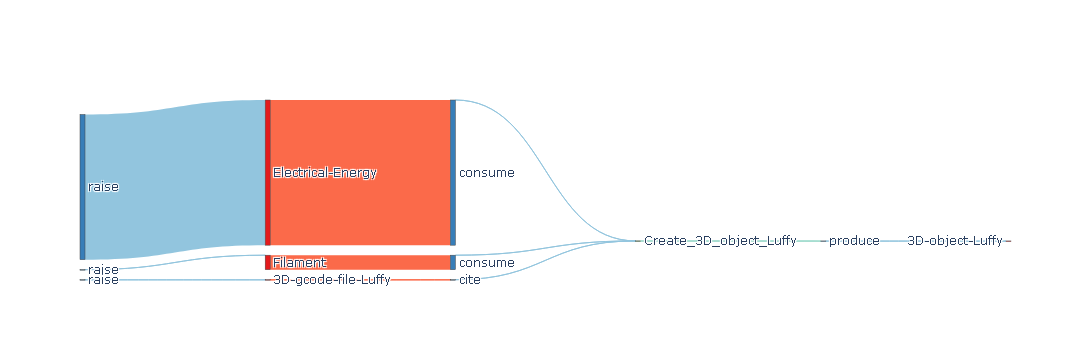

In [79]:
labels = []
sources = []
targets = []
values = []
color_nodes = []
color_links = []
assigned = {}
vis_dpp(tot_dpp[0], count=0, assigned=assigned, labels=labels, targets=targets, sources=sources, values=values, color_nodes=color_nodes, color_links=color_links)
sources, targets = consol_trace(assigned, sources, targets)
make_sankey(sources, targets, labels, values, color_nodes, color_links)
# make_sankey([0,0,1,2,2], [2,3,3,3,4], ['0','1','2','3','4'], [2,1,1,1,1], color_nodes, color_links)

In [80]:
label = ['Operating Expeditures', 
         'Public Safety', 
         'Engineering and Utilities', 
         'Community-Related Services', 
         'Corporate Support',
         'Police', 
         'Fire',
         'Utilities', 
         'Engineering Public Works',
         'Parks and Recreation', 
         'Arts, Culture, and Community Services',
         'Library', 
         'Development, Buildings, and Licensing',
         'Planning, Urban Design, and Sustainability', 
         'Other',
         'Corporate Support', 
         'Debt and Capital (Non-Utility)', 
         'Contingencies and Transfers']

color_node = ['#808B96', 
             '#EC7063', '#F7DC6F', '#48C9B0', '#AF7AC5',
             '#EC7063', '#EC7063',
             '#F7DC6F', '#F7DC6F',
             '#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0',
             '#AF7AC5', '#AF7AC5', '#AF7AC5']

color_link = ['#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5',
              '#EBBAB5', '#EBBAB5',
              '#FEF3C7', '#FEF3C7',
              '#A6E3D7', '#A6E3D7', '#A6E3D7', '#A6E3D7', '#A6E3D7', '#A6E3D7',
              '#CBB4D5', '#CBB4D5', '#CBB4D5']


source = [0, 0, 0, 0,
          1, 1,
          2, 2,
          3, 3, 3, 3, 3, 3,
          4, 4, 4]

target = [1, 2, 3, 4, 
          5, 6,
          7, 8, 
          9, 10, 11, 12, 13, 14, 
          15, 16, 17]

value = [484900, 468350, 355300, 306850, 
         339150, 145350, 
         371450, 96900, 
         129200, 80750, 48450, 48450, 32300, 16150, 
         113050, 129200, 64600]

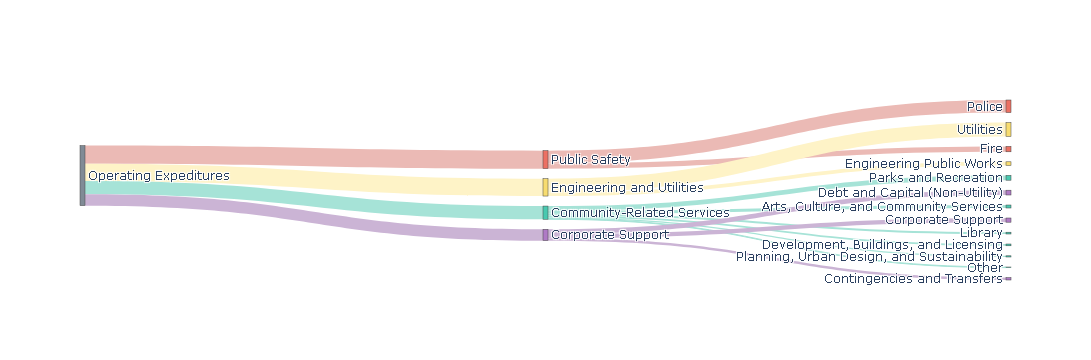

In [81]:
# data to dict, dict to sankey
import plotly.graph_objects as go
link = dict(source = source, target = target, value = value, color=color_link)
node = dict(label = label, pad=15, thickness=5, color=color_node)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()